In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h2> Recognize Process </h2>

In [2]:
cd/content/drive/MyDrive/OCR/Reactionary_MTA

/content/drive/.shortcut-targets-by-id/1dDgjdrz6Hx_b3xmNgvW2sYS1DpiZdt7o/OCR/Reactionary_MTA


In [3]:
!pip3 install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 4.9 MB/s eta 0:00:00


<h3> Download recognise data </h3>

In [ ]:
# cd/content/drive/MyDrive/OCR/Reactionary_MTA/dataset/ocr
# ! wget https://vocr.vn/data/vietocr/sample.zip
# ! unzip  -qq -o sample.zip

/content/drive/MyDrive/OCR/Reactionary_MTA/dataset/ocr


In [ ]:
! ls sample | shuf |head -n 5

036183007715.jpeg
457_statuses_74396.jpg
036301002139.jpeg
077078001025.jpeg
deskewed-2019_09_16_nguyen_thi_hoai_thanh_2019091614580813_18.jpg


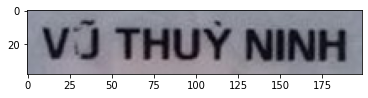

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
img = './sample/031189003299.jpeg'
img = Image.open(img)
plt.imshow(img)

In [ ]:
# ! wget https://vocr.vn/data/vietocr/data_line.zip

--2023-03-04 09:46:03--  https://vocr.vn/data/vietocr/data_line.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61212284 (58M) [application/zip]
Saving to: ‘data_line.zip’

data_line.zip       100%[===================>]  58.38M  10.2MB/s    in 6.9s    

2023-03-04 09:46:11 (8.42 MB/s) - ‘data_line.zip’ saved [61212284/61212284]



In [ ]:
# ! unzip -qq -o ./data_line.zip

In [ ]:
cd/content/drive/MyDrive/OCR/Reactionary_MTA

/content/drive/.shortcut-targets-by-id/139-jwfn33plliJR5SNk9djqcNge-CCZL/OCR/Reactionary_MTA


<h3> Train with vgg transformer backbone </h3>

In [ ]:
!python3 train_ocr.py --config 'vgg_transformer' \
                      --data-root './dataset/ocr/data_line/' \
                      --train 'train_line_annotation.txt' \
                      --test 'train_line_annotation.txt' \
                      --num-epochs 20000 \
                      --batch-size 32 \
                      --max-lr 0.0003 \
                      --export './weights/transformerocr.pth' \
                      --checkpoint './weights/transformerocr.pth'

Namespace(batch_size=32, checkpoint='./weights/transformerocr.pth', config='vgg_transformer', data_root='./dataset/ocr/data_line/', export='./weights/transformerocr.pth', max_lr=0.0003, num_epochs=20000, test='train_line_annotation.txt', train='train_line_annotation.txt')
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Cached Downloading: /root/.cache/gdown/https-COLON--SLASH--SLASH-vocr.vn-SLASH-data-SLASH-vietocr-SLASH-vg

<h3> Train with vgg seq2seq backbone </h3>

In [ ]:
!python3 train_ocr.py --config 'vgg_seq2seq' \
                      --data-root './dataset/ocr/data_line/' \
                      --train 'train_line_annotation.txt' \
                      --test 'train_line_annotation.txt' \
                      --num-epochs 20000 \
                      --batch-size 32 \
                      --max-lr 0.001 \
                      --export './weights/seq2seqocr.pth' \
                      --checkpoint './weights/seq2seqocr.pth'

Traceback (most recent call last):
  File "train_ocr.py", line 3, in <module>
    from vietocr.tool.predictor import Predictor
ModuleNotFoundError: No module named 'vietocr.tool'


<h2>Text Detection<h2>

<h3> Prepare data <h3>

In [ ]:
cd/content/drive/MyDrive/OCR/Reactionary_MTA/dataset/det/train_data 

/content/drive/MyDrive/OCR/Reactionary_MTA/dataset/det/train_data


In [ ]:
# !unzip './dataset/det/train_data/icdar2015/text_localization/ch4_test_images.zip' -d '/content/drive/MyDrive/OCR/Reactionary_MTA/dataset/det/train_data/icdar2015/text_localization/ch4_test_images'
# !unzip './dataset/det/train_data/icdar2015/text_localization/ch4_training_images.zip' -d '/content/drive/MyDrive/OCR/Reactionary_MTA/dataset/det/train_data/icdar2015/text_localization/ch4_training_images'

<h3> Download pretrained weights </h3>

In [ ]:
!cd/content/drive/MyDrive/OCR/Reactionary_MTA
# Download the pre-trained model of MobileNetV3
!wget -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/pretrained/MobileNetV3_large_x0_5_pretrained.pdparams
# # or, download the pre-trained model of ResNet18_vd
!wget -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/pretrained/ResNet18_vd_pretrained.pdparams
# # or, download the pre-trained model of ResNet50_vd
!wget -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/pretrained/ResNet50_vd_ssld_pretrained.pdparams


/bin/bash: cd/content/drive/MyDrive/OCR/Reactionary_MTA: No such file or directory
--2023-03-04 13:09:43--  https://paddleocr.bj.bcebos.com/pretrained/ResNet18_vd_pretrained.pdparams
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 103.235.46.61, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|103.235.46.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44851349 (43M) [application/octet-stream]
Saving to: ‘./pretrain_models/ResNet18_vd_pretrained.pdparams’

ResNet18_vd_pretrai 100%[===================>]  42.77M  9.60MB/s    in 21s     

2023-03-04 13:10:06 (2.04 MB/s) - ‘./pretrain_models/ResNet18_vd_pretrained.pdparams’ saved [44851349/44851349]

--2023-03-04 13:10:06--  https://paddleocr.bj.bcebos.com/pretrained/ResNet50_vd_ssld_pretrained.pdparams
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 103.235.46.61, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.

<h3> Install Dependencies </h3>

In [4]:
!python -m pip install paddlepaddle-gpu==2.4.2.post117 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.3/557.3 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.5/385.5 KB 31.9 MB/s eta 0:00:00


In [ ]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [5]:
!pip3 install Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.0/174.0 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.9 MB/s eta 0:00:00


In [6]:
!pip install "paddleocr>=2.0.1" # Recommend to use version 2.0.1+

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.9/445.9 KB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 KB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 100.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 97.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 92.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.4/148.4 KB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 KB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 KB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━

<h3> Training detection <h3>

In [ ]:
!python3 tools/train.py -c configs/det/det_mv3_db.yml -o   \
         Global.pretrained_model=./pretrain_models/MobileNetV3_large_x0_5_pretrained  \
         Optimizer.base_lr=0.0001

['Global.pretrained_model=./pretrain_models/MobileNetV3_large_x0_5_pretrained', 'Optimizer.base_lr=0.0001']
['Global.pretrained_model=./pretrain_models/MobileNetV3_large_x0_5_pretrained', 'Optimizer.base_lr=0.0001']
[2023/03/04 12:51:14] ppocr INFO: Architecture : 
[2023/03/04 12:51:14] ppocr INFO:     Backbone : 
[2023/03/04 12:51:14] ppocr INFO:         model_name : large
[2023/03/04 12:51:14] ppocr INFO:         name : MobileNetV3
[2023/03/04 12:51:14] ppocr INFO:         scale : 0.5
[2023/03/04 12:51:14] ppocr INFO:     Head : 
[2023/03/04 12:51:14] ppocr INFO:         k : 50
[2023/03/04 12:51:14] ppocr INFO:         name : DBHead
[2023/03/04 12:51:14] ppocr INFO:     Neck : 
[2023/03/04 12:51:14] ppocr INFO:         name : DBFPN
[2023/03/04 12:51:14] ppocr INFO:         out_channels : 256
[2023/03/04 12:51:14] ppocr INFO:     Transform : None
[2023/03/04 12:51:14] ppocr INFO:     algorithm : DB
[2023/03/04 12:51:14] ppocr INFO:     model_type : det
[2023/03/04 12:51:14] ppocr INFO

<h3> Infer detection </h3>

In [ ]:
!python3 tools/export_model.py -c configs/det/det_mv3_db.yml -o Global.pretrained_model="./output/det_mv3_pse/best_accuracy" Global.save_inference_dir="./output/det_mv3_pse_inference/"

['Global.pretrained_model=./output/det_mv3_pse/best_accuracy', 'Global.save_inference_dir=./output/det_mv3_pse_inference/']
['Global.pretrained_model=./output/det_mv3_pse/best_accuracy', 'Global.save_inference_dir=./output/det_mv3_pse_inference/']
W0305 12:54:28.718163 14681 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 7.5, Driver API Version: 12.0, Runtime API Version: 11.7
W0305 12:54:28.743404 14681 gpu_resources.cc:91] device: 0, cuDNN Version: 8.7.
[2023/03/05 12:54:30] ppocr WARNING: The pretrained params neck.toplayer_.conv.weight not in model
[2023/03/05 12:54:30] ppocr WARNING: The pretrained params neck.toplayer_.bn.weight not in model
[2023/03/05 12:54:30] ppocr WARNING: The pretrained params neck.toplayer_.bn.bias not in model
[2023/03/05 12:54:30] ppocr WARNING: The pretrained params neck.toplayer_.bn._mean not in model
[2023/03/05 12:54:30] ppocr WARNING: The pretrained params neck.toplayer_.bn._variance not in model
[2023/03/05 12:54:30] ppocr WAR

In [ ]:
!python3 tools/infer/predict_det.py --det_algorithm="DB" --det_model_dir="./output/en_PP-OCRv3_det_infer/" --image_dir="./image/sample_det" --use_gpu=True

[2023/03/05 12:59:37] ppocr INFO: image.jpeg	[[[4.0, 139.0], [249.0, 139.0], [249.0, 159.0], [4.0, 159.0]], [[19.0, 111.0], [233.0, 111.0], [233.0, 131.0], [19.0, 131.0]], [[48.0, 59.0], [208.0, 62.0], [208.0, 86.0], [48.0, 84.0]], [[22.0, 32.0], [239.0, 32.0], [239.0, 53.0], [22.0, 53.0]]]

[2023/03/05 12:59:37] ppocr INFO: The predict time of ./image/sample_det/image.jpeg: 1.4301705360412598
[2023/03/05 12:59:37] ppocr INFO: The visualized image saved in ./inference_results/det_res_image.jpeg
[2023/03/05 12:59:37] ppocr INFO: images.jpeg	[[[14.0, 132.0], [283.0, 132.0], [283.0, 143.0], [14.0, 143.0]], [[11.0, 115.0], [278.0, 117.0], [278.0, 130.0], [11.0, 129.0]], [[14.0, 104.0], [275.0, 104.0], [275.0, 114.0], [14.0, 114.0]], [[15.0, 89.0], [249.0, 89.0], [249.0, 100.0], [15.0, 100.0]], [[12.0, 74.0], [181.0, 74.0], [181.0, 84.0], [12.0, 84.0]], [[14.0, 41.0], [229.0, 41.0], [229.0, 56.0], [14.0, 56.0]], [[15.0, 19.0], [173.0, 19.0], [173.0, 33.0], [15.0, 33.0]]]

[2023/03/05 12:59:

In [ ]:
!python3 tools/infer/predict_det.py --det_algorithm="DB" --det_model_dir="./output/en_ppocr_mobile_v2.0_det_infer/" --image_dir="./image/sample_det" --use_gpu=True

[2023/03/05 13:01:03] ppocr INFO: image.jpeg	[[[3.0, 136.0], [253.0, 136.0], [253.0, 160.0], [3.0, 160.0]], [[18.0, 110.0], [231.0, 109.0], [231.0, 130.0], [18.0, 131.0]], [[47.0, 62.0], [210.0, 62.0], [210.0, 83.0], [47.0, 83.0]], [[18.0, 28.0], [240.0, 29.0], [240.0, 53.0], [18.0, 52.0]]]

[2023/03/05 13:01:03] ppocr INFO: The predict time of ./image/sample_det/image.jpeg: 1.4372210502624512
[2023/03/05 13:01:03] ppocr INFO: The visualized image saved in ./inference_results/det_res_image.jpeg
[2023/03/05 13:01:03] ppocr INFO: images.jpeg	[[[251.0, 105.0], [272.0, 105.0], [272.0, 113.0], [251.0, 113.0]], [[79.0, 105.0], [247.0, 105.0], [247.0, 112.0], [79.0, 112.0]], [[18.0, 90.0], [168.0, 90.0], [168.0, 98.0], [18.0, 98.0]], [[14.0, 74.0], [177.0, 74.0], [177.0, 84.0], [14.0, 84.0]], [[14.0, 42.0], [228.0, 42.0], [228.0, 57.0], [14.0, 57.0]], [[12.0, 18.0], [171.0, 18.0], [171.0, 33.0], [12.0, 33.0]], [[267.0, 8.0], [292.0, 8.0], [292.0, 35.0], [267.0, 35.0]]]

[2023/03/05 13:01:03] 

In [7]:
cd/content/drive/MyDrive/OCR/Reactionary_MTA

/content/drive/.shortcut-targets-by-id/1dDgjdrz6Hx_b3xmNgvW2sYS1DpiZdt7o/OCR/Reactionary_MTA


<h3> Demo OCR with VGG Transformer </h3>

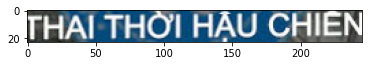

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
img = './image/res1.jpg'
img = Image.open(img)
plt.imshow(img)

In [ ]:
!python3 demo_ocr.py\
        --img ./image/res1.jpg\
        --config ./config_vgg_transformer.yml \
        --weight ./vietocr/weights/vgg_transformer.pth

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
THAI THỜI HẦU CHIẾN


<h3> Demo OCR with VGG Seq2seq </h3>

In [ ]:
!python3 demo_ocr.py\
        --img ./image/res1.jpg\
        --config ./config_vgg_seq2seq.yml \
        --weight ./vietocr/weights/vgg_seq2seq.pth

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
THAI THỜI HẬU CHIẾN


<h3> Demo detect 

In [ ]:
!python3 demo_detect.py

[2023/03/05 12:18:14] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_fce_box_type='poly', det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='quad', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='f

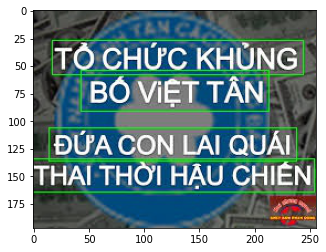

In [9]:
from PIL import Image
import matplotlib.pyplot as plt
img = './image/res.jpg'
img = Image.open(img)
plt.imshow(img)

<h2>Demo End To End Pineline </h2>

In [13]:
!pip3 install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 18.9 MB/s eta 0:00:00


In [16]:
!python3 demo_end2end.py

[2023/03/06 02:02:26] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, config='', cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_fce_box_type='poly', det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='quad', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pg

In [ ]:
!python3 tools/infer/predict_det.py --det_algorithm="PSE" --det_model_dir="./output/det_mv3_pse_inference/" --image_dir="./image/sample_det" --use_gpu=True

running build_ext
[2023/03/05 12:55:45] ppocr INFO: image.jpeg	[]

[2023/03/05 12:55:45] ppocr INFO: The predict time of ./image/sample_det/image.jpeg: 1.677879810333252
[2023/03/05 12:55:45] ppocr INFO: The visualized image saved in ./inference_results/det_res_image.jpeg
[2023/03/05 12:55:46] ppocr INFO: images.jpeg	[]

[2023/03/05 12:55:46] ppocr INFO: The predict time of ./image/sample_det/images.jpeg: 0.2235109806060791
[2023/03/05 12:55:46] ppocr INFO: The visualized image saved in ./inference_results/det_res_images.jpeg
[2023/03/05 12:55:47] ppocr INFO: thumb_660_59ff917c-96db-4331-a1df-01c74968894e.jpg	[]

[2023/03/05 12:55:47] ppocr INFO: The predict time of ./image/sample_det/thumb_660_59ff917c-96db-4331-a1df-01c74968894e.jpg: 1.4333624839782715
[2023/03/05 12:55:47] ppocr INFO: The visualized image saved in ./inference_results/det_res_thumb_660_59ff917c-96db-4331-a1df-01c74968894e.jpg
[2023/03/05 12:55:50] ppocr INFO: tmp.jpg	[]

[2023/03/05 12:55:50] ppocr INFO: The predict 

In [24]:
!python3 end2end.py --det_algorithm="DB" \
                    --det_model_dir="./output/en_PP-OCRv3_det_infer/" \
                    --image_dir="./image/sample_det" \
                    --use_gpu=True \
                    --config './config_vgg_transformer.yml' \
                    --weight-ocr './vietocr/weights/vgg_transformer.pth'

[2023/03/06 02:09:19] ppocr INFO: 331790718_3451367595185003_1595529763874913410_n.jpg	[[[1086.0, 1752.0], [1919.0, 1747.0], [1920.0, 1909.0], [1087.0, 1914.0]], [[316.0, 1577.0], [1971.0, 1572.0], [1971.0, 1687.0], [316.0, 1692.0]], [[68.0, 1391.0], [1975.0, 1387.0], [1976.0, 1508.0], [68.0, 1513.0]]]

[2023/03/06 02:09:19] ppocr INFO: The predict time of ./image/sample_det/331790718_3451367595185003_1595529763874913410_n.jpg: 1.4665963649749756
[2023/03/06 02:09:19] ppocr INFO: The visualized image saved in ./inference_results/det_res_331790718_3451367595185003_1595529763874913410_n.jpg
ocr_result Construction 031000000099 Commining 
[2023/03/06 02:09:20] ppocr INFO: 333500806_1423207085151590_8835670948295859802_n.jpg	[[[748.0, 1598.0], [1255.0, 1598.0], [1255.0, 1670.0], [748.0, 1670.0]], [[260.0, 1181.0], [1718.0, 1202.0], [1715.0, 1396.0], [257.0, 1375.0]], [[382.0, 964.0], [1603.0, 973.0], [1601.0, 1120.0], [381.0, 1111.0]], [[199.0, 712.0], [1770.0, 728.0], [1768.0, 918.0], [19

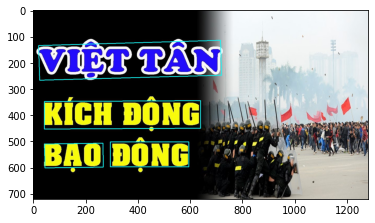

In [25]:
from PIL import Image
import matplotlib.pyplot as plt
img = './inference_results/det_res_viet-tan.jpg'
img = Image.open(img)
plt.imshow(img)

In [26]:
f =open("./inference_results/ocr_viet-tan.txt")
lines = f.readlines()
for line in lines:
    print(line)

Phản động

ALLION KICH DONG DONG 310 
